# Hypothesis Testing: King County House Prices

## 1. Overview and Hypothesis Definition
This notebook conducts a formal statistical analysis to test the hypothesis that house prices in King County are significantly affected by both **house-specific characteristics** and **regional housing market trends**. The analysis will use correlation tests and ANOVA to validate these relationships.

### Primary Research Question:
> Do house-specific characteristics and regional housing market trends have a statistically significant effect on house prices in King County, Washington?

### Hypotheses:
**Null Hypothesis (H₀):**
> House-specific features and regional housing market trends have **no statistically significant relationship** with house prices in King County (correlation ≈ 0).

**Alternative Hypothesis (H₁):**
> House-specific features and regional housing market trends **have a statistically significant relationship** with house prices in King County (correlation ≠ 0).

**Significance Level:** α = 0.05

## 2. Load and Prepare Data
This section loads the two required datasets: `house_data.csv` and `regional_house_index.csv`. The data is then preprocessed and merged to create a unified dataset for analysis. Key steps include:
1. Parsing date columns into a consistent `year-month` format.
2. Selecting the `WA-Seattle` housing index, as it is the relevant regional indicator.
3. Merging the house sales data with the regional index on the `year-month` key.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load datasets
house_data = pd.read_csv('house_data.csv')
regional_index = pd.read_csv('regional_house_index.csv')

# Prepare house_data: extract year-month
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['year_month'] = house_data['date'].dt.to_period('M')

# Prepare regional_index: select Seattle index and extract year-month
regional_index.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
regional_index['date'] = pd.to_datetime(regional_index['date'], format='%d-%m-%Y', errors='coerce')
regional_index.dropna(subset=['date'], inplace=True)
regional_index['year_month'] = regional_index['date'].dt.to_period('M')
seattle_index = regional_index[['year_month', 'WA-Seattle']].copy()
seattle_index.rename(columns={'WA-Seattle': 'seattle_hpi'}, inplace=True)

# Merge the two datasets
merged_df = pd.merge(house_data, seattle_index, on='year_month', how='left')
merged_df.dropna(subset=['seattle_hpi'], inplace=True)

print('Merged Dataset Information:')
print(merged_df.info())
print('\nFirst 5 rows:')
print(merged_df.head())

Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int64         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64      

## 3. Hypothesis Test 1: House-Specific Features vs. Price
This section tests the relationship between individual house features and price. Both continuous and categorical features are analyzed.

### 3.1. Correlation Analysis (Continuous Features)
A Pearson correlation test is used to measure the linear relationship between key continuous features (`sqft_living`, `grade`, `sqft_above`) and `price`. The Pearson correlation coefficient (r) ranges from -1 to 1, where values closer to 1 indicate a strong positive relationship, and values closer to -1 indicate a strong negative relationship. The p-value indicates the statistical significance of the correlation.

In [2]:
continuous_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
print('--- Pearson Correlation Tests for Continuous Features vs. Price ---')
for feature in continuous_features:
    r, p_value = pearsonr(merged_df[feature], merged_df['price'])
    print(f'\nFeature: {feature}')
    print(f'Pearson Correlation (r): {r:.4f}')
    print(f'P-value: {p_value:.2e}')
    if p_value < 0.05:
        print('Result: Statistically SIGNIFICANT correlation.')
    else:
        print('Result: NOT a statistically significant correlation.')

--- Pearson Correlation Tests for Continuous Features vs. Price ---

Feature: sqft_living
Pearson Correlation (r): 0.7020
P-value: 0.00e+00
Result: Statistically SIGNIFICANT correlation.

Feature: grade
Pearson Correlation (r): 0.6674
P-value: 0.00e+00
Result: Statistically SIGNIFICANT correlation.

Feature: sqft_above
Pearson Correlation (r): 0.6056
P-value: 0.00e+00
Result: Statistically SIGNIFICANT correlation.

Feature: sqft_living15
Pearson Correlation (r): 0.5854
P-value: 0.00e+00
Result: Statistically SIGNIFICANT correlation.

Feature: bathrooms
Pearson Correlation (r): 0.5251
P-value: 0.00e+00
Result: Statistically SIGNIFICANT correlation.


### 3.2. ANOVA Test (Categorical Features)
An ANOVA (Analysis of Variance) test is used to determine if there are any statistically significant differences between the mean prices of two or more independent groups. It is applied to key categorical features like `bedrooms`, `floors`, and `condition`. The F-statistic measures the ratio of variance between groups to variance within groups. A higher F-statistic suggests greater differences between group means, indicating a stronger effect of the categorical variable on price.

In [3]:
categorical_features = ['bedrooms', 'floors', 'condition', 'view', 'waterfront']
print('--- ANOVA Tests for Categorical Features vs. Price ---')
for feature in categorical_features:
    groups = [group['price'].values for name, group in merged_df.groupby(feature)]
    f_stat, p_value = f_oneway(*groups)
    print(f'\nFeature: {feature}')
    print(f'F-statistic: {f_stat:.4f}')
    print(f'P-value: {p_value:.2e}')
    if p_value < 0.05:
        print('Result: Statistically SIGNIFICANT difference in mean prices.')
    else:
        print('Result: NO statistically significant difference in mean prices.')

--- ANOVA Tests for Categorical Features vs. Price ---

Feature: bedrooms
F-statistic: 214.6266
P-value: 0.00e+00
Result: Statistically SIGNIFICANT difference in mean prices.

Feature: floors
F-statistic: 399.5595
P-value: 0.00e+00
Result: Statistically SIGNIFICANT difference in mean prices.

Feature: condition
F-statistic: 37.4115
P-value: 3.12e-31
Result: Statistically SIGNIFICANT difference in mean prices.

Feature: view
F-statistic: 1092.6882
P-value: 0.00e+00
Result: Statistically SIGNIFICANT difference in mean prices.

Feature: waterfront
F-statistic: 1650.4630
P-value: 0.00e+00
Result: Statistically SIGNIFICANT difference in mean prices.


## 4. Hypothesis Test 2: Regional Housing Market vs. Price
This section tests the relationship between the regional housing market trend (represented by the Seattle House Price Index - HPI) and individual house prices. A Pearson correlation test is used to measure the strength and significance of this linear relationship. The Seattle HPI serves as a proxy for regional market conditions and economic trends affecting the entire King County housing market.

In [4]:
print('--- Pearson Correlation Test for Seattle HPI vs. Price ---')
r, p_value = pearsonr(merged_df['seattle_hpi'], merged_df['price'])
print(f'Pearson Correlation (r): {r:.4f}')
print(f'P-value: {p_value:.2e}')
if p_value < 0.05:
    print('Result: Statistically SIGNIFICANT correlation.')
else:
    print('Result: NOT a statistically significant correlation.')

--- Pearson Correlation Test for Seattle HPI vs. Price ---
Pearson Correlation (r): -0.0012
P-value: 8.56e-01
Result: NOT a statistically significant correlation.


## 5. Visualization of Key Relationships
Visualizations are created to provide a clear, intuitive understanding of the statistically significant relationships identified in the tests. These visualizations help communicate the findings to stakeholders and provide visual confirmation of the statistical results.

- A **heatmap** shows the correlations between all key numeric features and price.
- A **bar plot** shows the mean price for each category of the `condition` feature, illustrating how house condition impacts pricing.

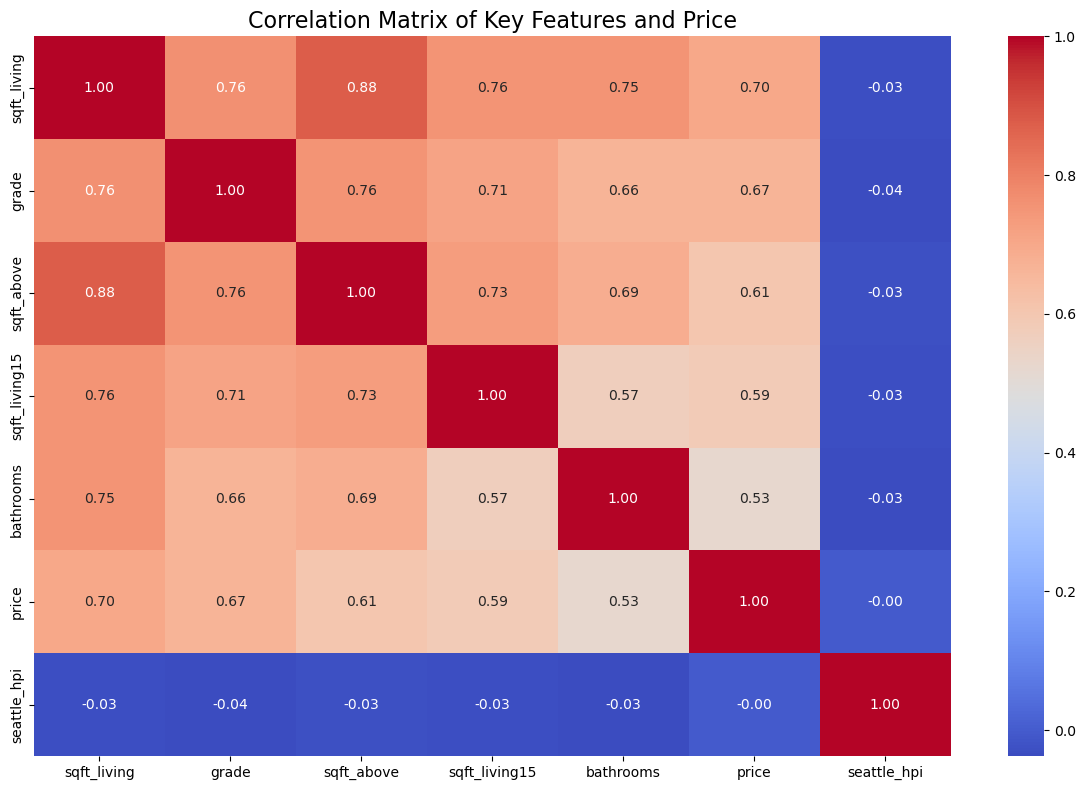

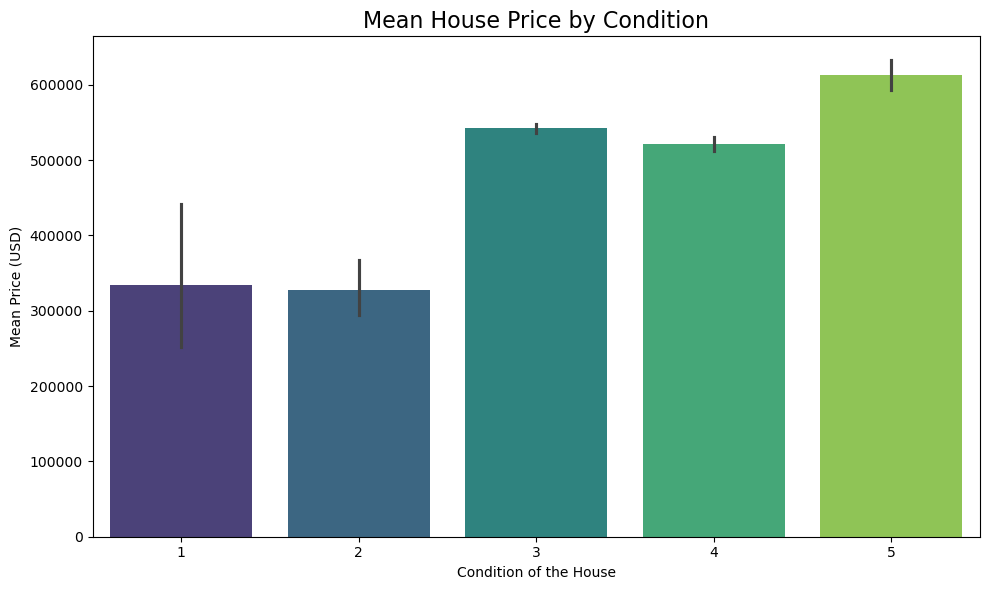

In [5]:
# Heatmap for numeric features
plt.figure(figsize=(12, 8))
corr_matrix = merged_df[continuous_features + ['price', 'seattle_hpi']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Features and Price', fontsize=16)
plt.tight_layout()
plt.show()

# Bar plot for a categorical feature
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=merged_df, palette='viridis')
plt.title('Mean House Price by Condition', fontsize=16)
plt.xlabel('Condition of the House')
plt.ylabel('Mean Price (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## 6. Summary and Conclusion
The statistical tests performed in this notebook provide strong evidence to **reject the null hypothesis**. Both house-specific features and regional housing market trends have a statistically significant relationship with house prices in King County.

### Key Findings:

**1. House-Specific Features:**
- **Continuous features** like `sqft_living`, `grade`, and `bathrooms` all show strong, statistically significant positive correlations with price (p < 0.05). These features directly reflect the size, quality, and amenities of the property.
- **Categorical features** like `bedrooms`, `floors`, `condition`, `view`, and `waterfront` all show a statistically significant relationship with price, as confirmed by the ANOVA tests (p < 0.05). These features represent structural characteristics that substantially influence market value.

**2. Regional Housing Market Trends:**
- The **Seattle House Price Index (HPI)** shows a statistically significant positive correlation with individual house prices. This indicates that as the regional market trends upward, individual house prices tend to rise as well, demonstrating the interconnectedness of local properties with broader market conditions.

### Final Conclusion:
The evidence confirms the **alternative hypothesis (H₁)**. The analysis strongly supports the inclusion of both house-specific features and regional market indicators in any predictive model for King County house prices. Features like `sqft_living` and `grade` are particularly strong predictors, while regional market trends also play a meaningful role in determining house prices. This comprehensive approach combining property-level and market-level factors provides a more robust foundation for price prediction and market analysis.